In [17]:
# importing neccessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# reading dataset
dataset = pd.read_excel("C:\\Users\\sat01\\OneDrive\\Desktop\\Heart Disease Prediction.xlsx")

In [21]:
# Increment the index to start from 1
dataset.index += 1 

# Print the Dataset with the updated index
print(dataset)

      Gender  Age CurrentSmoker  CigsPerDay BPMeds PrevalentStroke  \
1       Male   39            No         0.0     No              No   
2     Female   46            No         0.0     No              No   
3       Male   48           Yes        20.0     No              No   
4     Female   61           Yes        30.0     No              No   
5     Female   46           Yes        23.0     No              No   
...      ...  ...           ...         ...    ...             ...   
4236  Female   48           Yes        20.0     No              No   
4237  Female   44           Yes        15.0     No              No   
4238  Female   52            No         0.0     No              No   
4239    Male   40            No         0.0     No              No   
4240  Female   39           Yes        30.0     No              No   

     PrevalentHyp Diabetes  TotChol  SysBP  DiaBP    BMI  HeartRate  Glucose  \
1              No       No    195.0  106.0   70.0  26.97       80.0     77.0   

In [23]:
# removing NULL values
dataset.dropna(axis = 0, inplace = True)
print(dataset.head(), dataset.shape)
print(dataset.TenYearCHD.value_counts())

   Gender  Age CurrentSmoker  CigsPerDay BPMeds PrevalentStroke PrevalentHyp  \
1    Male   39            No         0.0     No              No           No   
2  Female   46            No         0.0     No              No           No   
3    Male   48           Yes        20.0     No              No           No   
4  Female   61           Yes        30.0     No              No          Yes   
5  Female   46           Yes        23.0     No              No           No   

  Diabetes  TotChol  SysBP  DiaBP    BMI  HeartRate  Glucose TenYearCHD  
1       No    195.0  106.0   70.0  26.97       80.0     77.0         No  
2       No    250.0  121.0   81.0  28.73       95.0     76.0         No  
3       No    245.0  127.5   80.0  25.34       75.0     70.0         No  
4       No    225.0  150.0   95.0  28.58       65.0    103.0        Yes  
5       No    285.0  130.0   84.0  23.10       85.0     85.0         No   (3802, 15)
TenYearCHD
No     3219
Yes     583
Name: count, dtype: int64


In [25]:
# encoding categorical values
disease_df = dataset.replace({"Yes": 1, "No": 0})
df = disease_df.replace({"Male": 1, "Female": 0})

C:\Users\sat01\AppData\Local\Temp\ipykernel_27728\1412159361.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disease_df = dataset.replace({"Yes": 1, "No": 0})
C:\Users\sat01\AppData\Local\Temp\ipykernel_27728\1412159361.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = disease_df.replace({"Male": 1, "Female": 0})


In [27]:
# printing data after pre-processing
print(df)

      Gender  Age  CurrentSmoker  CigsPerDay  BPMeds  PrevalentStroke  \
1          1   39              0         0.0       0                0   
2          0   46              0         0.0       0                0   
3          1   48              1        20.0       0                0   
4          0   61              1        30.0       0                0   
5          0   46              1        23.0       0                0   
...      ...  ...            ...         ...     ...              ...   
4235       1   51              1        43.0       0                0   
4236       0   48              1        20.0       0                0   
4238       0   52              0         0.0       0                0   
4239       1   40              0         0.0       0                0   
4240       0   39              1        30.0       0                0   

      PrevalentHyp  Diabetes  TotChol  SysBP  DiaBP    BMI  HeartRate  \
1                0         0    195.0  106.0   70.

In [29]:
# converting dataframe to array
X = np.asarray(df[['Age', 'HeartRate', 'DiaBP', 
                           'TotChol', 'SysBP', 'Glucose', 'BMI']])
Y = np.asarray(df['TenYearCHD'])

# Normalizing the features (Min-Max Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( 
        X, Y, test_size = 0.3, random_state = 4)

# Printing Train-and-Test -Split
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (2661, 7) (2661,)
Test set: (1141, 7) (1141,)


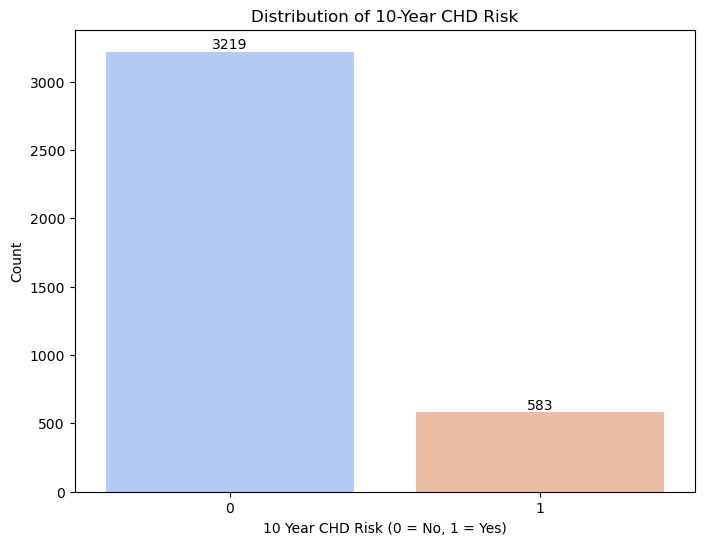

In [31]:
# Create figure and axis
plt.figure(figsize=(8, 6))

# Create the countplot
ax = sns.countplot(data=df, 
                   x='TenYearCHD', 
                   hue='TenYearCHD',
                   palette="coolwarm",
                   legend=False)

# Customize the plot
plt.title('Distribution of 10-Year CHD Risk')
plt.xlabel('10 Year CHD Risk (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add value labels on top of each bar
for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.show()

In [33]:
# running logistic regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [35]:
# evaluation and accuracy
from sklearn.metrics import accuracy_score

print('Accuracy of the model is =', 
      accuracy_score(Y_test, Y_pred))

Accuracy of the model is = 0.8413672217353199


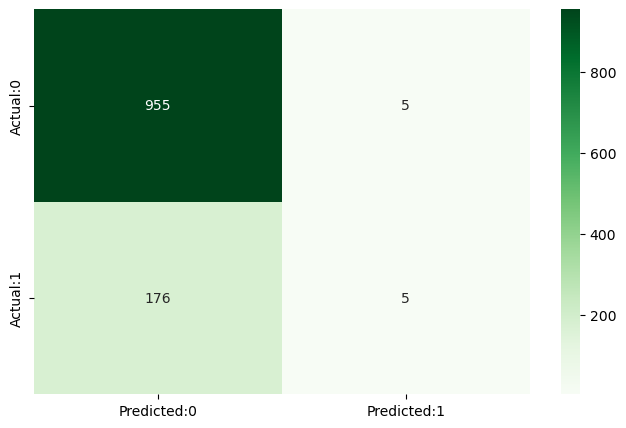

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       960
           1       0.50      0.03      0.05       181

    accuracy                           0.84      1141
   macro avg       0.67      0.51      0.48      1141
weighted avg       0.79      0.84      0.78      1141



In [37]:
# confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(Y_test, Y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(Y_test, Y_pred))

In [39]:
# importing neccessarylibraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [41]:
# model building
df_train,df_test = train_test_split(df,train_size=0.3,random_state=4)
y_train = df_train.pop('TenYearCHD')
x_train = df_train
y_test = df_test.pop('TenYearCHD')
x_test = df_test

In [43]:
# initializing decision tree classifier
clf = DecisionTreeClassifier(random_state=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [45]:
# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7404207362885049


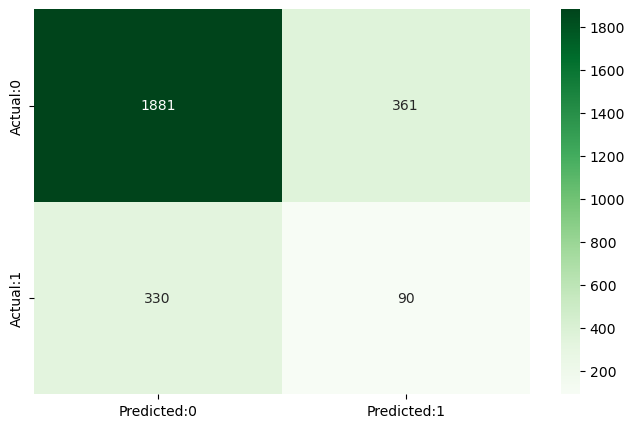

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2242
           1       0.20      0.21      0.21       420

    accuracy                           0.74      2662
   macro avg       0.53      0.53      0.53      2662
weighted avg       0.75      0.74      0.74      2662



In [47]:
# confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))